In [ ]:
-- INTRODUCTION
-- My analysis is an exploration of any relationship between gross income, account usage, and account longevity amongst credit card users for a bank.
-- The columns I analyzed are Months_on_book, Months_Inactive_12_mon, Income_Category, Avg_Utilization_Ratio, and Credit_Limit.
-- I intend to offer stakeholders insights pertaining to the accountholders most likely not to churn and the account activity most common for these accounts.

In [1]:
from sqlalchemy import  create_engine
import pandas as pd
from scipy import stats
import seaborn as sns
import math
import matplotlib.pyplot as plt
sns.set()

churn = pd.read_csv("C:\\Users\\qlect\\Documents\\creditcardchurn.csv")

churn.isnull().sum()

CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 21                 10127
dtype: int64

In [ ]:
-- TEST 1
-- The first analysis I conducted was an exploration of the relationship between account longevity and account activity via a t-test and box plots
-- The metrics I used were months on book (seperated at the 36 month mark) and months inactive within the last 12 months.

In [14]:
over_36count = (churn['Months_on_book'] > 36).sum()
under_36count = (churn['Months_on_book'] < 36).sum()
print(over_36)
print(under_36)

3862
3802


In [25]:
over_36 = churn[(churn['Months_on_book'] > 36).values]
under_36 = churn[(churn['Months_on_book'] < 36).values]

In [ ]:
-- NULL HYPOTHESIS 1
-- 'There is no significant difference in average months inactive for accounts that have been open for more than 36 months and less than 36 months'

In [43]:
stats.ttest_ind(over_36['Months_Inactive_12_mon'],under_36['Months_Inactive_12_mon'] )

Ttest_indResult(statistic=4.8415740092250505, pvalue=1.3133744857209708e-06)

In [35]:
get_95_ci(over_36['Months_Inactive_12_mon'],under_36['Months_Inactive_12_mon'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.15894375017100953 and -0.06739028699932086.'

<Axes: xlabel='Months_Inactive_12_mon'>

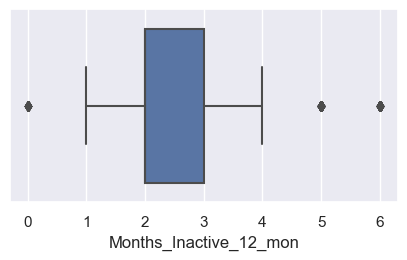

In [37]:
plt.figure(figsize = (5,2.5))
sns.boxplot(x = 'Months_Inactive_12_mon', data = over_36, orient ='h')

<Axes: xlabel='Months_Inactive_12_mon'>

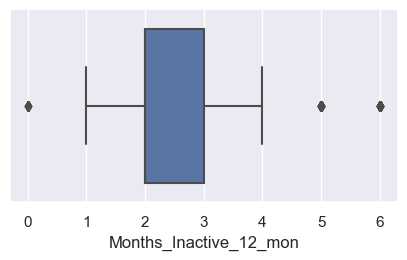

In [40]:
plt.figure(figsize = (5,2.5))
sns.boxplot(x = 'Months_Inactive_12_mon', data = under_36, orient ='h')

In [ ]:
-- TEST 1 RESULTS
-- The box plots for the months inactive in the last 12 months for accounts open for more and less than 36 months appear identical. 
-- However, the t-test did confirm there is a statistically significant difference in average months inactive in the last twelve months for the two sets of account holders.
-- With a p-value well below .05 we can reject the null hypothesis and conclude that account holders who maintain their accounts past 36 months are slightly less active than other account holders.
-- This is a valuable insight for the account actvivity of customers who do not churn.

In [ ]:
-- TEST 2
-- The objective of this analysis is to compare account holders with $60K - $80K and $80K - $120K income levels based on average utilization ratio. 
-- To begin, I determined the samples are of a suitable size relative to one another for performing a t-test. 

In [17]:
churn['Income_Category'].value_counts()['$60K - $80K']

1402

In [16]:
churn['Income_Category'].value_counts()['$80K - $120K']

1535

In [32]:
midclass = churn[(churn['Income_Category'] == '$60K - $80K').values]
uppermid = churn[(churn['Income_Category'] == '$80K - $120K').values]

In [ ]:
-- NULL HYPOTHESIS 2
-- 'There is no significant difference between average utilization ratios for customers whose income is $60K - $80K and $80K - $120K.'

In [33]:
stats.ttest_ind(midclass['Avg_Utilization_Ratio'], uppermid['Avg_Utilization_Ratio'])

Ttest_indResult(statistic=5.430517694034313, pvalue=6.078068089037409e-08)

In [34]:
get_95_ci(midclass['Avg_Utilization_Ratio'],uppermid['Avg_Utilization_Ratio'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.06051553797299901 and -0.02830656075055556.'

<Axes: xlabel='Avg_Utilization_Ratio'>

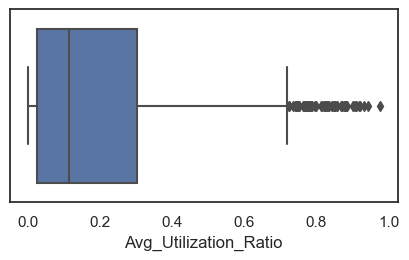

In [25]:
plt.figure(figsize = (5,2.5))
sns.boxplot(x = 'Avg_Utilization_Ratio', data = midclass, orient ='h')

<Axes: xlabel='Avg_Utilization_Ratio'>

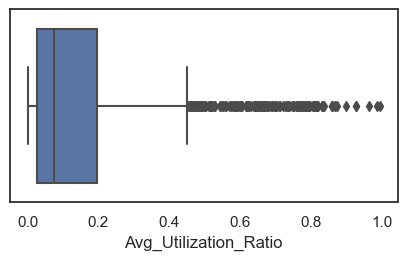

In [26]:
plt.figure(figsize = (5,2.5))
sns.boxplot(x = 'Avg_Utilization_Ratio', data = uppermid, orient = 'h')

In [ ]:
-- TEST 2 RESULTS
-- This test yielded a p-value 6.078068089037409e-08. 
-- We can reject the null hypothesis and conclude the difference in means at the 95% confidence interval (two-tail) is between -0.06051553797299901 and -0.02830656075055556 and is statistically significant. 
-- Using this conclusion and by visually comparing box plots for the two samples we can see that account holders at the $80K - $120K income level have significantly lower average utilization ratios.
-- We can again conclude diminished account acvtivity is a characteristic of longterm account holders. 

In [ ]:
-- TEST 3
-- To conclude the analysis and solidify the findings, I performed a Pearson correlation test on the average utilization ratio and credit limit for the $80K - $120K income level exclusively.

In [ ]:
-- NULL HYPOTHESIS 3
-- 'There is no correlation between average utilization ratio and credit limit.'

In [12]:
stats.pearsonr(uppermid['Avg_Utilization_Ratio'], uppermid['Credit_Limit'])

PearsonRResult(statistic=-0.570757676883509, pvalue=2.1689622660549e-133)

<Axes: xlabel='Avg_Utilization_Ratio', ylabel='Credit_Limit'>

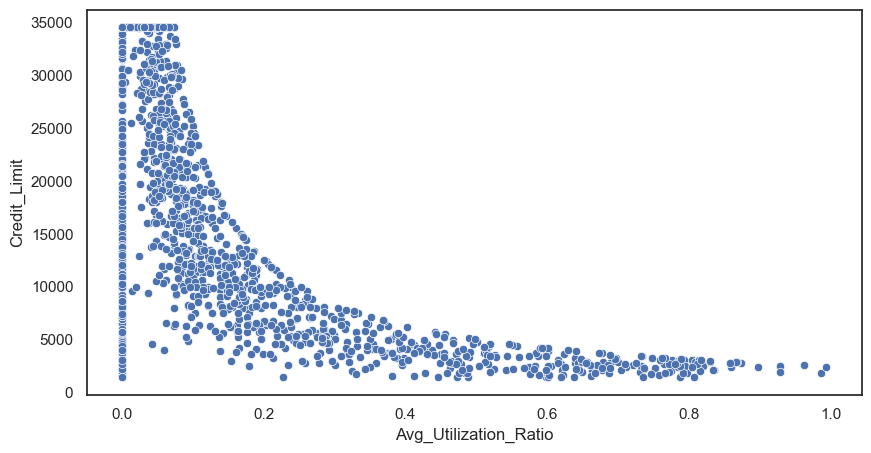

In [18]:
plt.figure(figsize = (10,5))
sns.set_style('white')
sns.scatterplot(x = 'Avg_Utilization_Ratio', y = 'Credit_Limit', data = uppermid)

<Axes: xlabel='Months_on_book', ylabel='Count'>

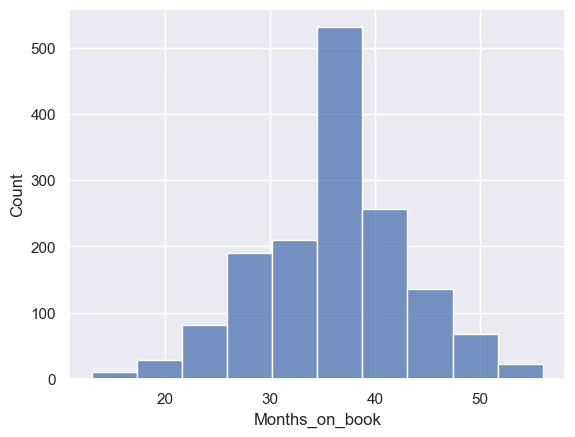

In [14]:
sns.histplot(uppermid['Months_on_book'], bins = 10)

In [ ]:
-- The test revealed a test statistic of -0.571 and a p value 2.1689622660549e-133. 
-- These findings alongside a corresponding scatterplot make it clear that account holders at this income level maintain lower average utilization ratios as their credit limits grow. 
-- A histogram of the time these account holders remain on the books shows that they are overwhelmingly likely to maintain their accounts for greater than 25 months. 
-- We can conclude account holders at the $80K - $120K income level are valuable because they are unlikely to churn compared to account holders at lower income levels. 
-- Targeting these current and potential customers will strengthen the bank and reduce credit card churn.
-- Accounting personnel should look to increase credit limit when feasible as a means of improving customer satisfaction and influencing valued account holders to lower their average utilization ratios.
-- Bank executives can monitor average utilization ratio as a means of prediciting churn.
-- Marketing personnel should target and prioritize account holders at the $80K - $120K income level.